<a href="https://colab.research.google.com/github/vvthakral/data-science-bootcamp/blob/main/knn_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#Load file from local
from google.colab import files
upload = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
#Load the dataset
#Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Find shape
df.shape

(768, 9)

In [5]:
#Some basic analysis
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


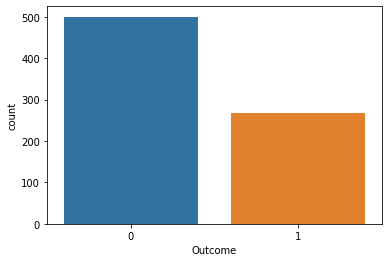

In [6]:
sns.countplot(df['Outcome'],label="Count")

In [7]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
#Creating X and Y for training and testing
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [9]:
#Split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [ ]:
help(KNeighborsClassifier)

In [10]:
#Checking train and test accuracies over a range of K values
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

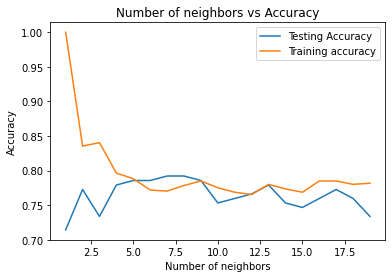

In [11]:
plt.title('Number of neighbors vs Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [13]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [14]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
y_knn = knn.predict(X_test)
knn.score(X_test,y_test)

0.7922077922077922

In [15]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.77


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.79
Accuracy on test set: 0.79


In [17]:
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.81
Accuracy on test set: 0.81


In [18]:
y_pred = svc.predict(X_test_scaled) 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       100
           1       0.80      0.59      0.68        54

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



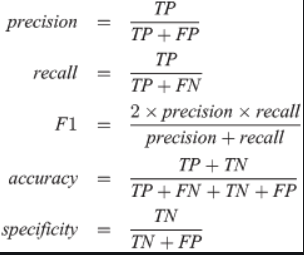

Based on the above metrices what can a doctor tell with the most probability?

In [19]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_test_scaled, y_test, cv=5)
scores

array([0.70967742, 0.80645161, 0.80645161, 0.77419355, 0.76666667])

In [20]:
scores.sum()/len(scores)

0.7726881720430108